# Pre-processing: Determining the start point of trials

As was explained in the paper, a trial was definded to start at a time to passing (TTP) of 9.0 seconds, and end at the moment of passing (TTP = 0 s).

In this notebook, we load the TTP = 0s time stamps and from there, calculate the TTP = 9.0 time stamps.


## Load functions and data, and organize

In [12]:
%reload_ext autoreload
%autoreload 2
# %matplotlib notebook

import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from scipy import stats

from TomsFunctions import *

import pickle

# Some helper functions to import, export and slice data:
def save_obj(obj, name, path = 'obj/'):
    with open(path + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name, path = 'obj/'):
    with open(path + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def slice_df(df, col, lb = -np.inf, ub = np.inf):
    # slice dataframe between lowerbound (lb) and upper bound (ub) 
    # in colum (col) of dataframe (df)
    return df.loc[(df[col] < ub) & (df[col] > lb)]

# Load data from 'obj' folder.
stamps = load_obj('stampswithttc9')
participants = load_obj('participants')

#Select folder that contains the recorded data:
participantfolder = '/Participants'  

#Preprocessing, adds column to stamps dataframe if it does not exist
try: 
    stamps['ttp9stamp']
except:
    stamps = pd.concat([stamps, pd.DataFrame({'ttp9stamp': [np.nan] * len(stamps)})], axis=1)

try: 
    stamps['nearestto9']
except:
    stamps = pd.concat([stamps, pd.DataFrame({'nearestto9': [np.nan] * len(stamps)})], axis=1)
   

In [32]:
test

,participant,run,filename_si,filename_py,slice_no,t90,t_pass,duration,direction,warnings,ttc90,minttc,ttc9s
0,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,1,28730,37200,8470,FL,NaN,1.900400e+01,7.15457,NaN
1,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,2,41560,57140,15580,FR,NaN,7.511508e+00,2.79964,NaN
2,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,3,65890,74880,8990,FL,NaN,inf,9.01297,NaN
3,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,4,81380,92100,10720,BL,NaN,inf,11.6039,83000.007812
4,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,5,98150,110010,11860,BR,NaN,1.064373e+01,2.85721,100033.343750
5,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,6,123440,126610,3170,FRs,NaN,2.557742e+00,0.00204004,NaN
6,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,7,152790,161500,8709.99,FL,NaN,inf,6.66797,NaN
7,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,8,167430,178820,11390,BL,NaN,2.425158e+01,18.0322,169033.328125
8,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,9,193160,196650,3490,FRs,NaN,2.620618e+00,0.00264153,NaN
9,XSMS,noucfog,NOUC_HUMC_fog_DataFile.7.asc,20181025161134.csv,10,230250,240210,9960,BR,NaN,9.242735e+00,2.40302,230533.328125



## Extract the TTP 9.0 time stamps from recording. 

The following procedure uses the function ttp_fog_front() from the imported file TomsFunctions.py to extract the TTP stamps that will form the start point of each trial. The function definition can be found in the TomsFunctions.py file.

The ttp_fog_front function regards all the trials where a vehicle approached from the front. These should be three vehicles from the left lane, five from the right lane. 

The function ttp_fog_front takes the following arguments:
* experimental run
* an initial time stamps file, containing the time stamps when vehicles passed (t_pass column)
* the path that contains the recorded data (participantfolder)

And returns:
* A dataframe with stamps, appended with a column with the identified TTP 9.0 stamps.

How: 
1.  Select first participant
1. For this participant, find first time stamp in t_pass column where a vehicle passed from the front. These are the trial end points.
1. For each trial end point, we want to determine the trial start point (TTP = 9.0 s).
1. We can safely assume that the start point of a trial (TTP = 9.0s) lies somewhere between the moment of passing minus 15 seconds. So, a time window is isolated with the 15 seconds leading up to the overtake.
1. In this window, the first occurrence where TTP drops below 9.0s is selected as the starting point of the trial.
1. Proceed with next trial, from 2
1. Proceed with next participant, start at 1. 


The results are stored in the stamps dataframe, and a plot with an overview is generated. 
Rows contain the participant, and columns represent the n-th trial. Note that some participants do not contain eight trials, this was due to errors by experimenters in launching the vehicles manually. However, no critical trials were lost.





XSMS
SPPV
TTQW
NNTZ
TWOU
MVNT
ZPQX
PVNT
OYWO
PVOU
WVPV
TTVN
QPMS
UVUM


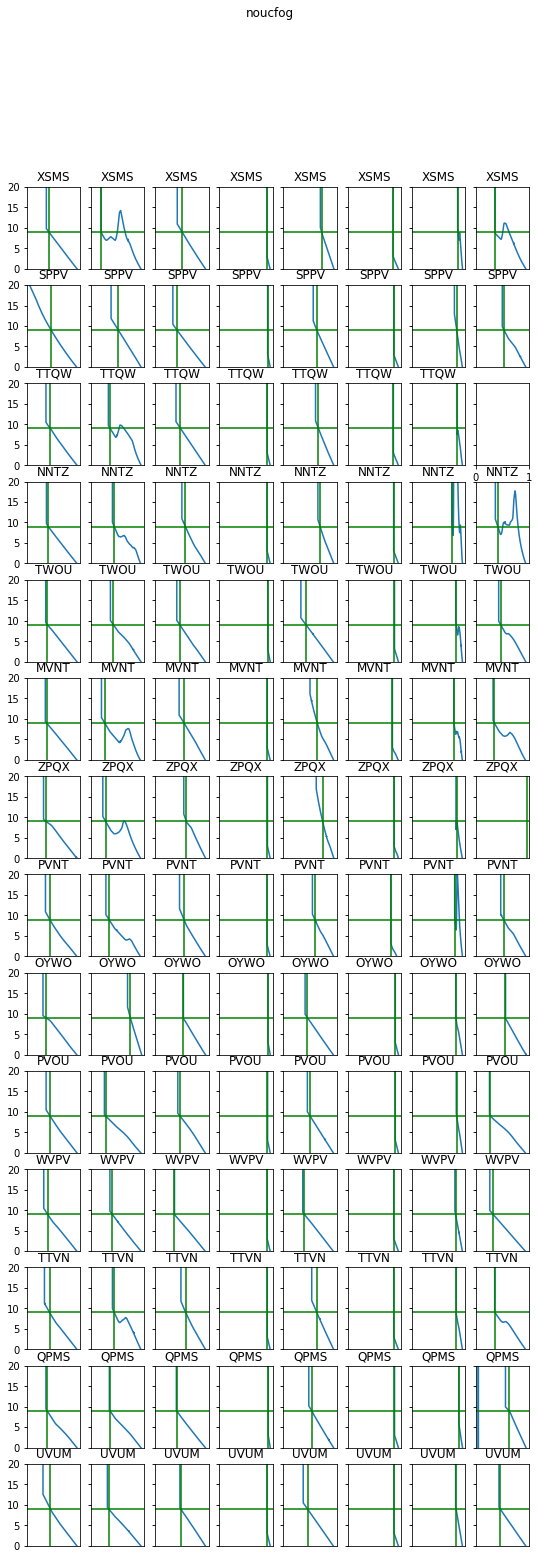

In [19]:
# Find time stamps for 'noucfog' experimental run (= MC-HU run). 
stamps = ttp_fog_front('noucfog', stamps, participantfolder)


Note that, in the above plot some intersections fall well below the horizontal line that represents TTP=9.0 seconds. This is the case for the vehicles that were standing completely still on the right lane. See the thesis document for an explanation of this error (Appendix B.2).

XSMS
SPPV
TTQW
NNTZ
TWOU
MVNT
ZPQX
PVNT
OYWO
PVOU
WVPV
TTVN
QPMS
UVUM


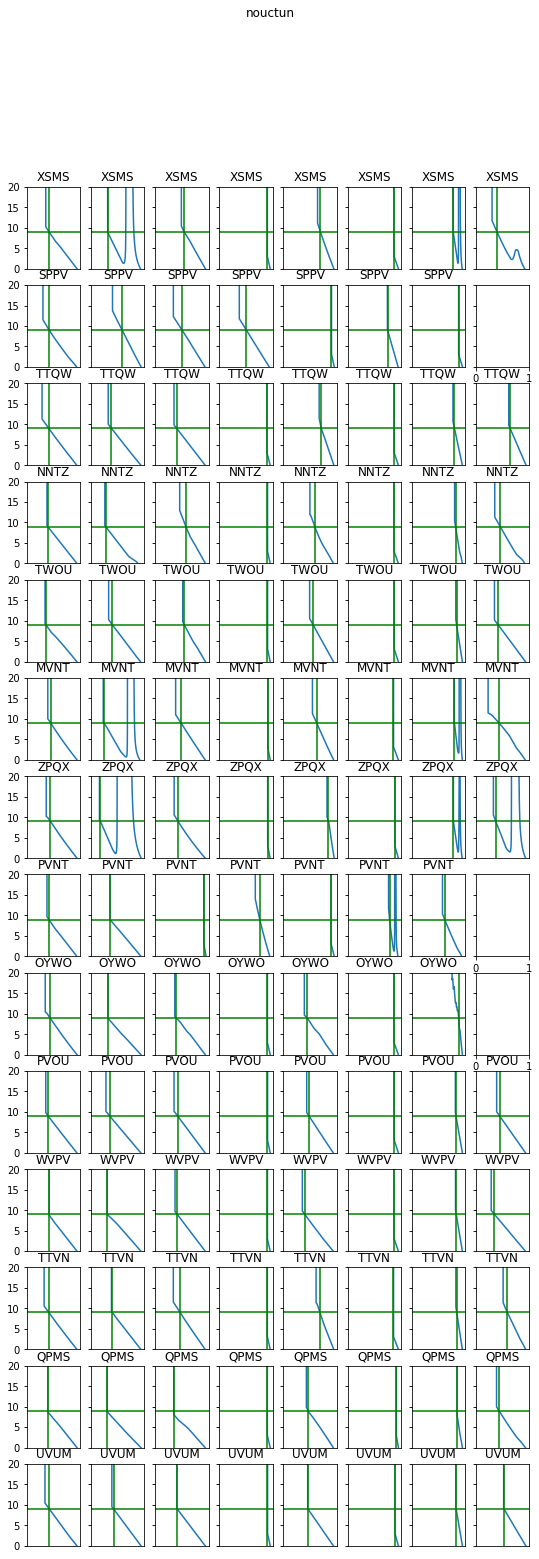

In [20]:
# Find time stamps for 'nouctun' experimental run (= MU-HU). 
stamps = ttp_fog_front('nouctun', stamps, participantfolder)


XSMS
SPPV
TTQW
NNTZ
TWOU
MVNT
ZPQX
PVNT
OYWO
PVOU
WVPV
TTVN
QPMS
UVUM


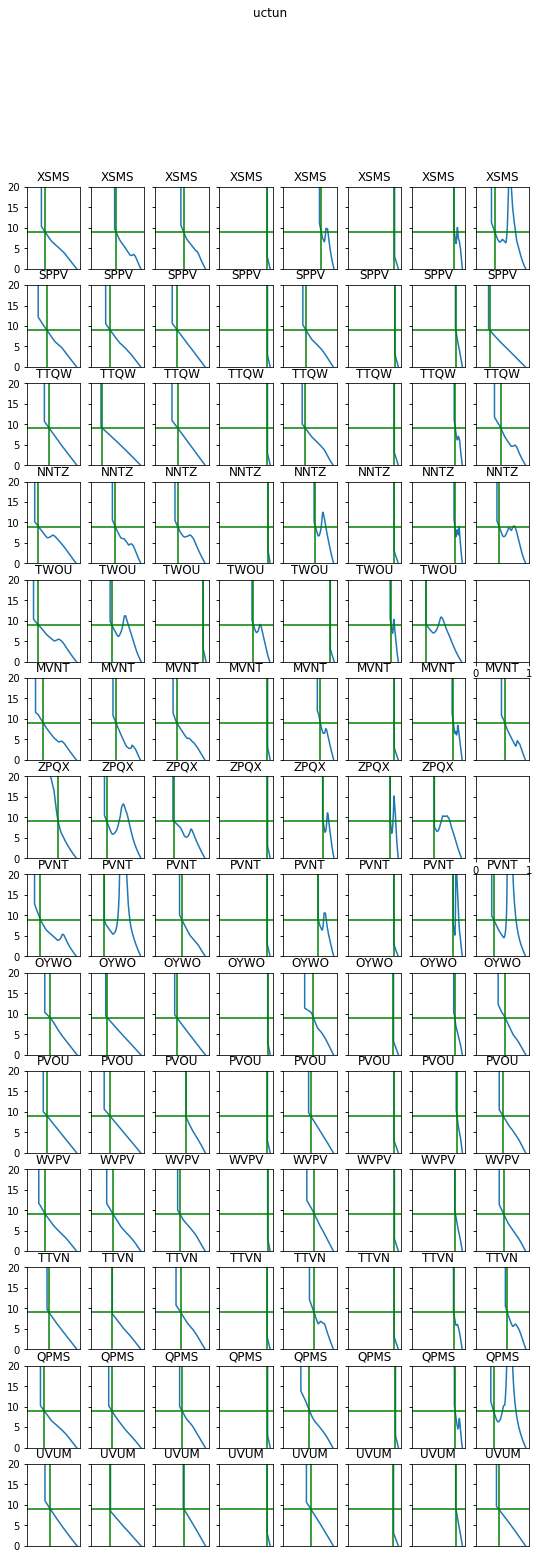

In [21]:
# Find time stamps for 'uctun' experimental run (= MU-HU-uc run). 
stamps = ttp_fog_front('uctun', stamps, participantfolder)

# Organize output and save object

In [27]:
newstamps = stamps[['participant', 'run', 'direction', 't90', 'ttc9s','ttp9stamp', 'nearestto9', 't_pass']]
ttp9m = newstamps.apply(lambda x: x['ttc9s'] if np.isnan(x['ttp9stamp']) else x['ttp9stamp'], axis = 1 )
newstamps = pd.concat([newstamps, pd.DataFrame({'t_ttp9': ttp9m})],axis=1)
newstamps = newstamps[['participant', 'run', 'direction', 't90',  't_pass', 't_ttp9']]

In [28]:
save_obj(newstamps, 'fogstamps_final')

The following dataframe was produced. Each row represents a trial. The last two columns denote the starting and end time stamps of the trial. 

In [33]:
newstamps

,participant,run,direction,t90,t_pass,t_ttp9
0,XSMS,noucfog,FL,28730,37200,28160.000000
1,XSMS,noucfog,FR,41560,57140,40300.000000
2,XSMS,noucfog,FL,65890,74880,66020.000000
3,XSMS,noucfog,BL,81380,92100,83000.007812
4,XSMS,noucfog,BR,98150,110010,100033.343750
5,XSMS,noucfog,FRs,123440,126610,123000.000000
6,XSMS,noucfog,FL,152790,161500,152250.000000
7,XSMS,noucfog,BL,167430,178820,169033.328125
8,XSMS,noucfog,FRs,193160,196650,192700.010000
9,XSMS,noucfog,BR,230250,240210,230533.328125


Note that there are also values available for the rear vehicles. These were calculated in a copy of this script, applied to the rear vehicles.